In [1]:
!git init
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | bash
!apt-get install git-lfs
!git lfs install
# !git clone https://huggingface.co/roberta-large
# !git clone https://huggingface.co/facebook/bart-base
# !git clone https://huggingface.co/bert-base-uncased
# !git clone https://huggingface.co/microsoft/deberta-base
!git clone https://huggingface.co/distilroberta-base

Initialized empty Git repository in /kaggle/working/.git/
Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.



The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 2129 kB of archives.
After this operation, 7662 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 git-lfs amd64 2.3.4-1 [2129 kB]
Fetched 2129 kB in 0s (10.9 MB/s)
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package git-lfs.
(Reading database ... 100757 files and directories currently installed.)
Preparing to 

In [2]:
import re
import os
import numpy as np
import pandas as pd
import random
import math
import tensorflow as tf
import tensorflow_addons as tfa
import logging
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from tensorflow.keras import backend as K
from transformers import RobertaTokenizer, TFDistilBertModel, BertTokenizer, AutoTokenizer, TFAutoModel
from kaggle_datasets import KaggleDatasets
tf.get_logger().setLevel(logging.ERROR)
from kaggle_datasets import KaggleDatasets

In [3]:
# Configurations
EPOCHS = 100#150#30#10#70
# Batch size
BATCH_SIZE = 32#16#24
# Seed
SEED = 123
# Learning rate
LR = 3e-5#2e-5 #0.000040
# Weight decay
WD = LR/EPOCHS
epsilon=1e-6

# Verbosity
VERBOSE = 2
# Number of folds for training
FOLDS = 5

# Max length
MAX_LEN = 256 #300#250

# Get the trained model we want to use
MODEL = './distilroberta-base'#'./bert-base-uncased'#'./roberta-large'#'roberta-base'

# Let's load our model tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# For tf.dataset
AUTO = tf.data.experimental.AUTOTUNE



--------------------------------------------------
Training fold 1


Some layers from the model checkpoint at ./distilroberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at ./distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 256)]             0         
_________________________________________________________________
tf_roberta_model (TFRobertaM TFBaseModelOutputWithPool 82118400  
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 769       
Total params: 82,119,169
Trainable params: 82,119,169
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
4/4 - 17s - loss: 1.3149 - root_mean_squared_error: 1.1467 - val_loss: 1.0587 - val_root_mean_squared_error: 1.0289

Epoch 00001: val_root_mean_squared_error improved from inf to 1.02892, saving model to Bert_Base_123_1.h5
Epoch 2

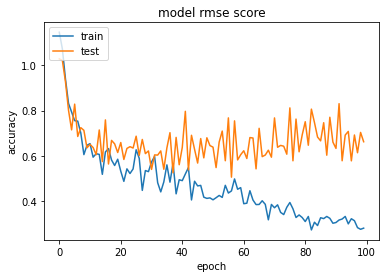

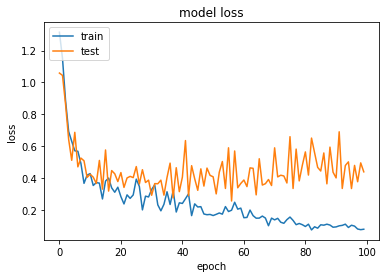



--------------------------------------------------
Training fold 2


Some layers from the model checkpoint at ./distilroberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at ./distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 256)]             0         
_________________________________________________________________
tf_roberta_model (TFRobertaM TFBaseModelOutputWithPool 82118400  
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 769       
Total params: 82,119,169
Trainable params: 82,119,169
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
4/4 - 17s - loss: 3.7799 - root_mean_squared_error: 1.9442 - val_loss: 1.3705 - val_root_mean_squared_error: 1.1707

Epoch 00001: val_root_mean_squared_error improved from inf to 1.17069, saving model to Bert_Base_123_2.h5
Epoch 2

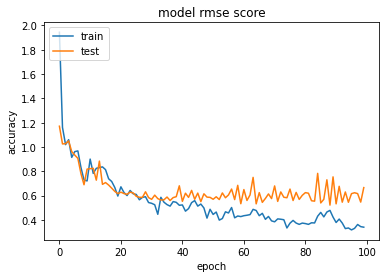

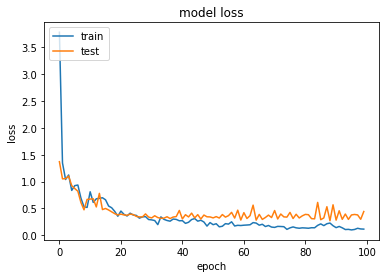



--------------------------------------------------
Training fold 3


Some layers from the model checkpoint at ./distilroberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at ./distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 256)]             0         
_________________________________________________________________
tf_roberta_model (TFRobertaM TFBaseModelOutputWithPool 82118400  
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 769       
Total params: 82,119,169
Trainable params: 82,119,169
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
4/4 - 17s - loss: 1.4175 - root_mean_squared_error: 1.1906 - val_loss: 1.2093 - val_root_mean_squared_error: 1.0997

Epoch 00001: val_root_mean_squared_error improved from inf to 1.09970, saving model to Bert_Base_123_3.h5
Epoch 2

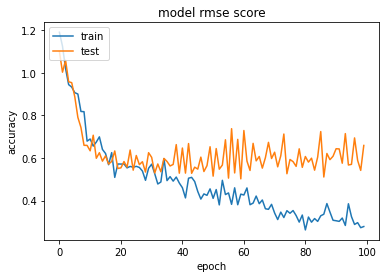

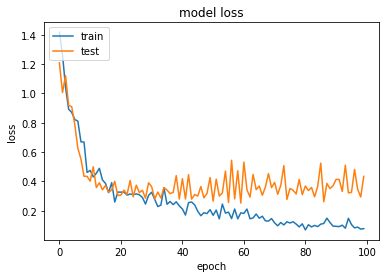



--------------------------------------------------
Training fold 4


Some layers from the model checkpoint at ./distilroberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at ./distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 256)]             0         
_________________________________________________________________
tf_roberta_model (TFRobertaM TFBaseModelOutputWithPool 82118400  
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 769       
Total params: 82,119,169
Trainable params: 82,119,169
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
4/4 - 17s - loss: 2.4300 - root_mean_squared_error: 1.5588 - val_loss: 1.1284 - val_root_mean_squared_error: 1.0623

Epoch 00001: val_root_mean_squared_error improved from inf to 1.06228, saving model to Bert_Base_123_4.h5
Epoch 2

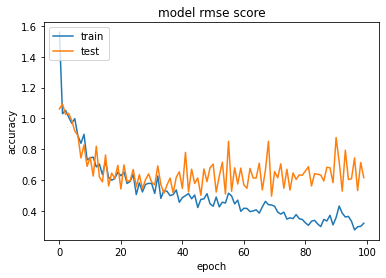

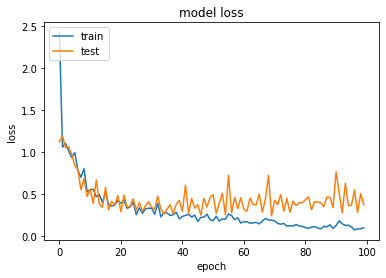



--------------------------------------------------
Training fold 5


Some layers from the model checkpoint at ./distilroberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at ./distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 256)]             0         
_________________________________________________________________
tf_roberta_model (TFRobertaM TFBaseModelOutputWithPool 82118400  
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 769       
Total params: 82,119,169
Trainable params: 82,119,169
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
4/4 - 18s - loss: 2.1438 - root_mean_squared_error: 1.4642 - val_loss: 1.1272 - val_root_mean_squared_error: 1.0617

Epoch 00001: val_root_mean_squared_error improved from inf to 1.06170, saving model to Bert_Base_123_5.h5
Epoch 2

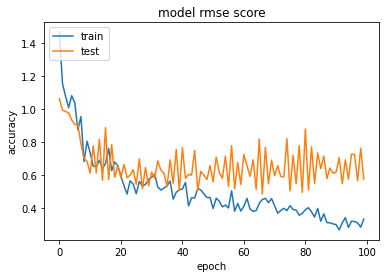

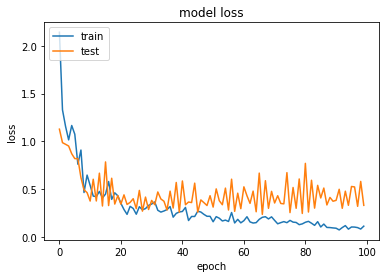



--------------------------------------------------
Our out of folds RMSE is 0.5020264043270394


In [4]:
# Function to seed everything
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.random.set_seed(seed)

# This function tokenize the text according to a transformers model tokenizer
def regular_encode(texts, tokenizer, maxlen = MAX_LEN):
    enc_di = tokenizer.batch_encode_plus(
        texts,
        padding = 'max_length',
        truncation = True,
        max_length = maxlen,
    )
    
    return np.array(enc_di['input_ids'])

# This function encode our training sentences
def encode_texts(x_train, x_val, MAX_LEN):
    x_train = regular_encode(x_train.tolist(), tokenizer, maxlen = MAX_LEN)
    x_val = regular_encode(x_val.tolist(), tokenizer, maxlen = MAX_LEN)
    return x_train, x_val

# Function to transform arrays to tensors
def transform_to_tensors(x_train, x_val, y_train, y_val):
    
    train_dataset = (
        tf.data.Dataset
        .from_tensor_slices((x_train, y_train))
        .repeat()
        .shuffle(2048)
        .batch(BATCH_SIZE)
        .prefetch(AUTO)
    )
    
    valid_dataset = (
        tf.data.Dataset
        .from_tensor_slices((x_val, y_val))
        .batch(BATCH_SIZE)
        .prefetch(AUTO)
    )
    
    return train_dataset, valid_dataset

# Function to build our model
def build_roberta_base_model(max_len = MAX_LEN):
    transformer = TFAutoModel.from_pretrained(MODEL)
    input_word_ids = tf.keras.layers.Input(shape = (max_len, ), dtype = tf.int32, name = 'input_word_ids')
    sequence_output = transformer(input_word_ids)[0]
    # We only need the cls_token, resulting in a 2d array
    cls_token = sequence_output[:, 0, :]
    output = tf.keras.layers.Dense(1, activation = 'linear', dtype = 'float32')(cls_token)
    model = tf.keras.models.Model(inputs = [input_word_ids], outputs = [output])
    print(model.summary())
    model.compile(#optimizer = tf.keras.optimizers.Adam(lr = LR),#tfa.optimizers.AdamW(learning_rate = LR),#tf.keras.optimizers.Adam(lr = LR),
        optimizer = tfa.optimizers.AdamW(learning_rate = LR, weight_decay=WD, epsilon= epsilon),          
        loss = [tf.keras.losses.MeanSquaredError()],
                  metrics = [tf.keras.metrics.RootMeanSquaredError()])
    return model

# Function to train and evaluate our model
def train_and_evaluate():
    
    # Read our training data
    df = pd.read_csv('../input/commonlitreadabilityprize/train.csv')
    # Seed everything
    seed_everything(SEED)
    
    # Initiate kfold object with shuffle and a specific seed
    kfold = KFold(n_splits = FOLDS, shuffle = True, random_state = SEED)
    # Create out of folds array to store predictions
    oof_predictions = np.zeros(len(df))
    
    for fold, (trn_ind, val_ind) in enumerate(kfold.split(df)):
        print('\n')
        print('-'*50)
        print(f'Training fold {fold + 1}')
        K.clear_session()
        # Get text features and target
        x_train, x_val = df['excerpt'].iloc[trn_ind], df['excerpt'].iloc[val_ind]
        y_train, y_val = df['target'].iloc[trn_ind].values, df['target'].iloc[val_ind].values
        # Encode our text with Roberta tokenizer
        x_train, x_val = encode_texts(x_train, x_val, MAX_LEN)
        # Function to transform our numpy array to a tf Dataset
        train_dataset, valid_dataset = transform_to_tensors(x_train, x_val, y_train, y_val)
        # Build model
        model = build_roberta_base_model(max_len = MAX_LEN)
        # Model checkpoint
        checkpoint = tf.keras.callbacks.ModelCheckpoint(f'Bert_Base_{SEED}_{fold + 1}.h5', 
                                                        monitor = 'val_root_mean_squared_error', 
                                                        verbose = VERBOSE, 
                                                        save_best_only = True,
                                                        save_weights_only = True, 
                                                        mode = 'min')
        steps = x_train.shape[0] // (BATCH_SIZE * 16)
        # Training phase
        history = model.fit(train_dataset,
                            batch_size = BATCH_SIZE,
                            epochs = EPOCHS,
                            verbose = VERBOSE,
                            callbacks = [checkpoint],
                            validation_data = valid_dataset,
                            steps_per_epoch = steps)
        
        # summarize history for accuracy
        plt.plot(history.history['root_mean_squared_error'])
        plt.plot(history.history['val_root_mean_squared_error'])
        plt.title('model rmse score')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        # summarize history for loss
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        
        # Load best epoch weights
        model.load_weights(f'Bert_Base_{SEED}_{fold + 1}.h5')
        # Predict validation set to save them in the out of folds array
        val_pred = model.predict(valid_dataset)
        oof_predictions[val_ind] = val_pred.reshape(-1)
#         break
    print('\n')
    print('-'*50)
    # Calculate out of folds root mean squared error
    oof_rmse = np.sqrt(mean_squared_error(df['target'], oof_predictions))
    print(f'Our out of folds RMSE is {oof_rmse}')
    

train_and_evaluate()

In [5]:
# transformer = DebertaModel.from_pretrained(MODEL)
# input_word_ids = tf.keras.layers.Input(shape = (MAX_LEN, ), dtype = tf.int32, name = 'input_word_ids')
# print(transformer(input_word_ids))
# sequence_output = transformer(input_word_ids)[0]
# # We only need the cls_token, resulting in a 2d array
# print(sequence_output)
# # cls_token = sequence_output[:, 0, :]
# # output = tf.keras.layers.Dense(1, activation = 'linear', dtype = 'float32')(cls_token)
# # model = tf.keras.models.Model(inputs = [input_word_ids], outputs = [output])
# # model.compile(#optimizer = tf.keras.optimizers.Adam(lr = LR),#tfa.optimizers.AdamW(learning_rate = LR),#tf.keras.optimizers.Adam(lr = LR),
# #     optimizer = tfa.optimizers.AdamW(learning_rate = LR, weight_decay=WD, epsilon= epsilon),          
# #     loss = [tf.keras.losses.MeanSquaredError()],
# #               metrics = [tf.keras.metrics.RootMeanSquaredError()])


In [6]:
from transformers import DistilBertModel, DistilBertConfig
# Initializing a DistilBERT configuration
configuration = DistilBertConfig()
print(configuration)
# Initializing a model from the configuration
model = DistilBertModel(configuration)
print('--------------------')
# Accessing the model configuration
configuration = model.config
print(configuration)

DistilBertConfig {
  "activation": "gelu",
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "transformers_version": "4.5.1",
  "vocab_size": 30522
}

--------------------
DistilBertConfig {
  "activation": "gelu",
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "transformers_version": "4.5.1",
  "vocab_size": 30522
}



In [7]:
configuration

DistilBertConfig {
  "activation": "gelu",
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "transformers_version": "4.5.1",
  "vocab_size": 30522
}